# Two-dimensional quantum dots using configuration interaction

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from quantum_systems import TwoDimensionalHarmonicOscillator
from configuration_interaction import CIS, CID, CISD

## Defining the system

In [61]:
n = 2
l = 20

radius = 20
num_grid_points = 401
omega = 0.01
mass = 1

## Singles excitations

In [62]:
tdho = TwoDimensionalHarmonicOscillator(
    n, l, radius, num_grid_points, omega=omega, mass=mass
)
tdho.setup_system()
tdho.change_to_hf_basis(tolerance=1e-10, verbose=True)

HF converged to given precision in 19 iterations
Ehf: (0.1083212460862159+0j)


In [63]:
cis = CIS(tdho, brute_force=False, verbose=True, np=np)
cis.setup_ci_space()

Number of states to create: 37
Size of a state in bytes: 8
Time spent setting up CIS space: 2.0503997802734375e-05 sec


In [64]:
cis.compute_ground_state()

Time spent constructing Hamiltonian: 0.0006680488586425781 sec
Time spent diagonalizing Hamiltonian: 0.00054931640625 sec


In [65]:
print("CIS ground state energy: {0}".format(cis.energies[0]))

CIS ground state energy: 0.07979187322553753


In [66]:
rho_cis = cis.compute_particle_density()

Time spent computing one-body matrix: 0.2047252655029297 sec


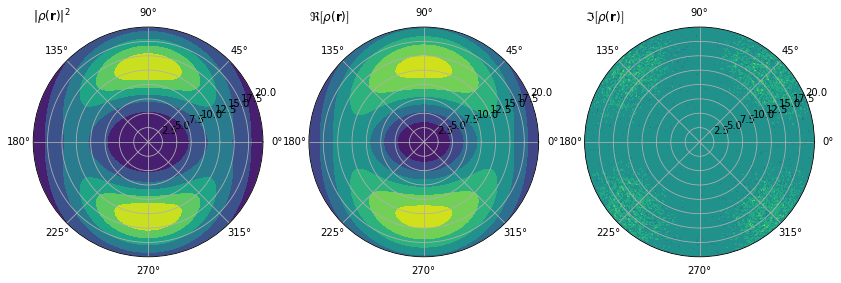

In [67]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho_cis * rho_cis.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cis.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cis.imag)
plt.show()

# Doubles excitations

In [68]:
tdho = TwoDimensionalHarmonicOscillator(
    n, l, radius, num_grid_points, omega=omega, mass=mass
)
tdho.setup_system()
tdho.change_to_hf_basis(tolerance=1e-10, verbose=True)

HF converged to given precision in 19 iterations
Ehf: (0.1083212460862159+0j)


In [69]:
cid = CID(tdho, brute_force=False, verbose=True, np=np)
cid.setup_ci_space()

Number of states to create: 154
Size of a state in bytes: 8
Time spent setting up CID space: 0.006795644760131836 sec


In [70]:
cid.compute_ground_state()

Time spent constructing Hamiltonian: 0.010393857955932617 sec
Time spent diagonalizing Hamiltonian: 0.025958538055419922 sec


In [71]:
print("CID ground state energy: {0}".format(cid.energies[0]))

CID ground state energy: 0.07429703470784507


In [72]:
rho_cid = cid.compute_particle_density()

Time spent computing one-body matrix: 3.343370199203491 sec


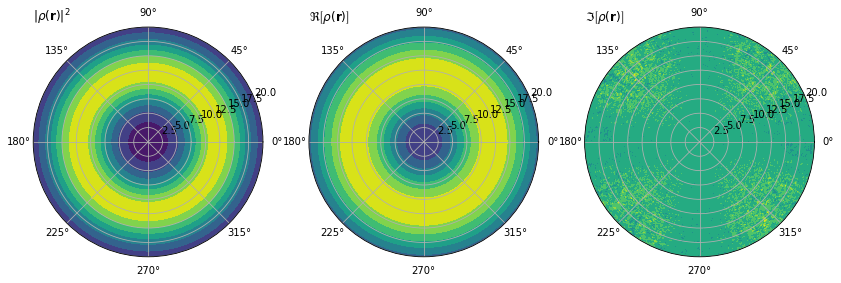

In [73]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho_cid * rho_cid.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cid.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cid.imag)
plt.show()

## Singles-doubles excitations

In [74]:
tdho = TwoDimensionalHarmonicOscillator(
    n, l, radius, num_grid_points, omega=omega, mass=mass
)
tdho.setup_system()
tdho.change_to_hf_basis(tolerance=1e-10, verbose=True)

HF converged to given precision in 19 iterations
Ehf: (0.1083212460862159+0j)


In [75]:
cisd = CISD(tdho, brute_force=False, verbose=True, np=np)
cisd.setup_ci_space()

Number of states to create: 190
Size of a state in bytes: 8
Time spent setting up CISD space: 0.0001742839813232422 sec


In [76]:
cisd.compute_ground_state()

Time spent constructing Hamiltonian: 0.01550912857055664 sec
Time spent diagonalizing Hamiltonian: 0.00931406021118164 sec


In [77]:
print("CISD ground state energy: {0}".format(cisd.energies[0]))

CISD ground state energy: 0.07429635508024333


In [78]:
rho_cisd = cisd.compute_particle_density()

Time spent computing one-body matrix: 5.078541994094849 sec


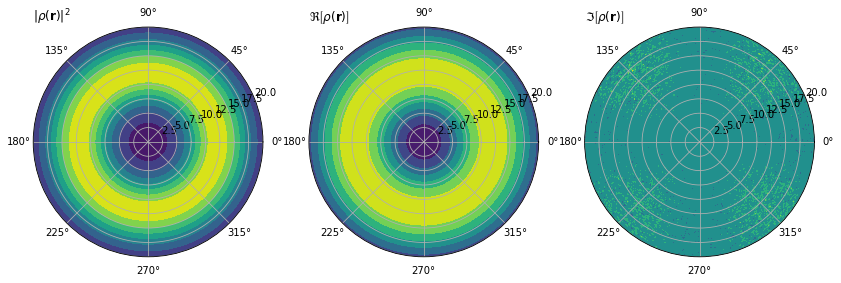

In [79]:
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(1, 3, 1, polar=True)
ax.set_title(r"$|\rho(\mathbf{r})|^2$", loc="left")
plt.contourf(tdho.T, tdho.R, np.abs(rho_cisd * rho_cisd.conj()))

ax = fig.add_subplot(1, 3, 2, polar=True)
ax.set_title(r"$\Re\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cisd.real)

ax = fig.add_subplot(1, 3, 3, polar=True)
ax.set_title(r"$\Im\left[\rho(\mathbf{r})\right]$", loc="left")
plt.contourf(tdho.T, tdho.R, rho_cisd.imag)
plt.show()

1.0


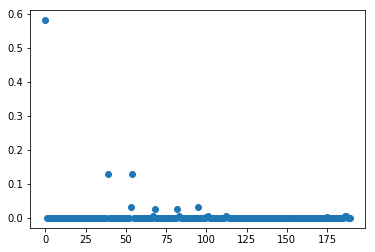

In [84]:
# Make plot of ground state coefficient weights
C0 = cisd._C[:, 0].real
print(np.sum(np.abs(C0) ** 2))
plt.plot(np.arange(len(C0)), np.abs(C0) ** 2, "o")
plt.show()